In [2]:
# Common imports
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

from numpy.random import seed
#from tensorflow import set_random_seed
import tensorflow

from keras.layers import Input, Dropout
from keras.layers.core import Dense 
from keras.models import Model, Sequential, load_model
from keras import regularizers
from keras.models import model_from_json

Using TensorFlow backend.


In [3]:
data = pd.read_csv("baldwin_pump_data.csv")

In [6]:
data.head()

,Unnamed: 0,BFP_SEAL_WATER_FLOW,BFP_SUCT_HDR_PRESS________,AUX_CDSR_2B_PRESS_________,BFP_SUCTION_HDR_TEMP______,BFPT_B_VALVE_DEMAND_HP_STO,BFPT_B_VALVE_DEMAND_LP_STO,BFPT_B_CALC_VALVE_DEMAND__,2B_TDBFP_RECIRC_VLV_DMD___,BFP_2B_DISCHARGE_FLOW_____,...,BFPT_2B_RAD_SHAFT_VIB_IB_B,BFP_2B_AXIAL_SHAFT_VIB____,BFPT_2B_THRUST_BRG_WEAR___,BFP_2B_RAD_SHAFT_VIB_OB_BR,BFP_2B_RAD_SHAFT_VIB_IB_BR,BFPT_2B_AXIAL_SHAFT_VIB___,MAIN_STEAM_FLOW_TO_BFPS___,EXT_STM_FLOW_TO_BFP_2B____,CW_FRM_AUX_CDSR_2B________,CW_TO_AUX_CDS_2B
0,5/1/98 0:00,14.35,136.18,29.2,88.57,0.01,0.0,0.0,99.98,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,68.11,65.72
1,5/1/98 0:05,14.35,136.18,29.2,88.57,0.01,0.0,0.0,99.98,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,68.11,65.72
2,5/1/98 0:10,14.35,136.18,29.2,88.57,0.01,0.0,0.0,99.98,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,68.11,65.72
3,5/1/98 0:15,14.35,136.18,29.2,88.57,0.01,0.0,0.0,99.98,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,68.11,65.72
4,5/1/98 0:20,14.34,136.18,29.2,88.57,0.01,0.0,0.0,99.98,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,68.11,65.72


In [7]:
data.describe()

,BFP_SEAL_WATER_FLOW,BFP_SUCT_HDR_PRESS________,AUX_CDSR_2B_PRESS_________,BFP_SUCTION_HDR_TEMP______,BFPT_B_VALVE_DEMAND_HP_STO,BFPT_B_VALVE_DEMAND_LP_STO,BFPT_B_CALC_VALVE_DEMAND__,2B_TDBFP_RECIRC_VLV_DMD___,BFP_2B_DISCHARGE_FLOW_____,BFP_2B_IBRD_SEAL_INJ_FLOW_,...,BFPT_2B_RAD_SHAFT_VIB_IB_B,BFP_2B_AXIAL_SHAFT_VIB____,BFPT_2B_THRUST_BRG_WEAR___,BFP_2B_RAD_SHAFT_VIB_OB_BR,BFP_2B_RAD_SHAFT_VIB_IB_BR,BFPT_2B_AXIAL_SHAFT_VIB___,MAIN_STEAM_FLOW_TO_BFPS___,EXT_STM_FLOW_TO_BFP_2B____,CW_FRM_AUX_CDSR_2B________,CW_TO_AUX_CDS_2B
count,12646.000000,8547.000000,12646.000000,12649.000000,12649.000000,12649.000000,12649.000000,12649.000000,12649.000000,903.000000,...,12553.000000,6934.000000,12575.000000,10219.000000,12481.000000,5799.000000,12646.000000,12572.000000,12635.000000,12649.000000
mean,23.281107,123.979296,17.955497,213.078506,13.272376,11.068407,21.738481,56.207975,919.609857,10.764109,...,1.355384,1.621853,-1.309330,0.416506,0.362154,0.510962,1.206328,26.611285,86.749409,80.396749
std,8.301245,51.385183,12.305330,119.658073,14.894889,14.488882,24.908255,49.565824,966.810058,5.507140,...,1.451068,0.972700,6.702563,0.366319,0.395678,0.108479,2.231682,35.155240,12.853988,5.915161
min,0.000000,1.380000,1.590000,72.380000,0.000000,0.000000,0.000000,0.000000,0.000000,5.020000,...,0.020000,0.000000,-15.790000,0.000000,0.000000,0.050000,0.000000,0.000000,66.050000,65.710000
25%,18.720000,62.325000,4.872500,94.560000,0.000000,0.000000,0.000000,0.000000,0.000000,7.130000,...,0.020000,1.710000,-8.060000,0.000000,0.000000,0.480000,0.000000,0.000000,73.580000,77.250000
50%,21.700000,144.790000,29.130000,120.450000,0.000000,0.000000,0.000000,99.980000,163.350000,9.950000,...,0.030000,1.760000,-3.050000,0.680000,0.020000,0.550000,0.000000,0.000000,85.240000,82.020000
75%,26.290000,155.730000,29.360000,338.290000,30.010000,30.010000,46.700000,99.980000,1971.650000,11.300000,...,2.940000,1.830000,5.990000,0.750000,0.810000,0.580000,1.560000,71.880000,98.910000,84.480000
max,72.000000,264.420000,30.680000,348.830000,30.010000,49.620000,100.000000,99.980000,2522.390000,34.280000,...,4.090000,7.100000,9.930000,1.940000,2.160000,1.160000,8.870000,80.620000,112.340000,90.710000


In [8]:
data.cov()

,BFP_SEAL_WATER_FLOW,BFP_SUCT_HDR_PRESS________,AUX_CDSR_2B_PRESS_________,BFP_SUCTION_HDR_TEMP______,BFPT_B_VALVE_DEMAND_HP_STO,BFPT_B_VALVE_DEMAND_LP_STO,BFPT_B_CALC_VALVE_DEMAND__,2B_TDBFP_RECIRC_VLV_DMD___,BFP_2B_DISCHARGE_FLOW_____,BFP_2B_IBRD_SEAL_INJ_FLOW_,...,BFPT_2B_RAD_SHAFT_VIB_IB_B,BFP_2B_AXIAL_SHAFT_VIB____,BFPT_2B_THRUST_BRG_WEAR___,BFP_2B_RAD_SHAFT_VIB_OB_BR,BFP_2B_RAD_SHAFT_VIB_IB_BR,BFPT_2B_AXIAL_SHAFT_VIB___,MAIN_STEAM_FLOW_TO_BFPS___,EXT_STM_FLOW_TO_BFP_2B____,CW_FRM_AUX_CDSR_2B________,CW_TO_AUX_CDS_2B
BFP_SEAL_WATER_FLOW,68.910671,30.217594,-23.510388,324.571026,17.404069,-3.068938,37.044842,-54.530548,1.028462e+03,-22.710727,...,2.091131,-2.428922,12.514425,0.063698,0.511686,-0.385243,-1.439294,-10.209664,28.380656,16.465138
BFP_SUCT_HDR_PRESS________,30.217594,2640.436993,-439.704388,4630.906508,540.456321,435.576218,890.472058,-1815.397241,3.533472e+04,53.529536,...,53.875104,18.593541,233.487523,10.967173,14.646616,0.852843,-7.805840,1109.393334,345.131722,66.183484
AUX_CDSR_2B_PRESS_________,-23.510388,-439.704388,151.421156,-1364.200401,-173.393533,-141.427547,-283.875528,576.924202,-1.073932e+04,10.421671,...,-17.279935,-6.669245,-73.924722,-4.187194,-4.597281,-0.309052,5.403715,-342.867646,-136.227169,-41.137929
BFP_SUCTION_HDR_TEMP______,324.571026,4630.906508,-1364.200401,14318.054513,1635.122461,1347.124579,2675.180268,-5452.775702,1.023836e+05,-144.104130,...,162.576916,50.067923,759.913456,39.187543,43.611247,1.601608,-57.969982,3288.285332,1363.890719,453.942572
BFPT_B_VALVE_DEMAND_HP_STO,17.404069,540.456321,-173.393533,1635.122461,221.857714,184.649379,362.645128,-732.276013,1.359164e+04,-0.941238,...,21.368516,9.249618,93.482968,5.376259,5.796952,0.449359,-6.841655,443.011720,170.260091,50.452667
BFPT_B_VALVE_DEMAND_LP_STO,-3.068938,435.576218,-141.427547,1347.124579,184.649379,209.927713,269.836678,-606.974615,1.122083e+04,-0.450573,...,17.645825,7.880837,79.408281,4.616382,4.890908,1.055472,-7.236264,501.968948,149.201765,46.304330
BFPT_B_CALC_VALVE_DEMAND__,37.044842,890.472058,-283.875528,2675.180268,362.645128,269.836678,620.421148,-1201.149833,2.232434e+04,0.592715,...,34.912343,14.873346,152.231333,8.676455,9.427260,0.375550,-10.064323,647.999952,275.909531,81.110585
2B_TDBFP_RECIRC_VLV_DMD___,-54.530548,-1815.397241,576.924202,-5452.775702,-732.276013,-606.974615,-1201.149833,2456.770949,-4.561218e+04,3.134312,...,-71.081472,-30.850009,-313.428078,-17.976040,-19.349911,-1.570314,22.592501,-1483.850627,-567.875861,-168.073963
BFP_2B_DISCHARGE_FLOW_____,1028.462469,35334.722468,-10739.324217,102383.639816,13591.637994,11220.825004,22324.340632,-45612.178960,9.347217e+05,-137.036628,...,1318.233529,556.636847,5844.371196,332.586594,361.115052,29.530457,-439.914447,27736.926044,10945.837272,3343.820126
BFP_2B_IBRD_SEAL_INJ_FLOW_,-22.710727,53.529536,10.421671,-144.104130,-0.941238,-0.450573,0.592715,3.134312,-1.370366e+02,30.328593,...,-0.392246,-0.040127,2.415062,-0.065294,-0.056428,0.051787,-1.101398,-0.615977,-17.945269,-19.788823


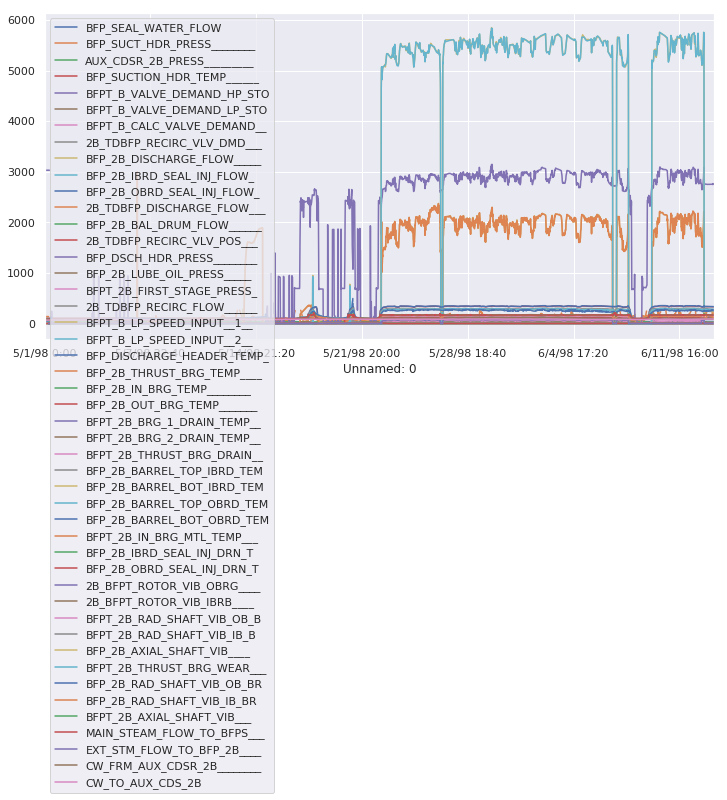

In [14]:
data.plot(x = "Unnamed: 0",figsize = (12,6))

In [10]:
data.head()

,Unnamed: 0,BFP_SEAL_WATER_FLOW,BFP_SUCT_HDR_PRESS________,AUX_CDSR_2B_PRESS_________,BFP_SUCTION_HDR_TEMP______,BFPT_B_VALVE_DEMAND_HP_STO,BFPT_B_VALVE_DEMAND_LP_STO,BFPT_B_CALC_VALVE_DEMAND__,2B_TDBFP_RECIRC_VLV_DMD___,BFP_2B_DISCHARGE_FLOW_____,...,BFPT_2B_RAD_SHAFT_VIB_IB_B,BFP_2B_AXIAL_SHAFT_VIB____,BFPT_2B_THRUST_BRG_WEAR___,BFP_2B_RAD_SHAFT_VIB_OB_BR,BFP_2B_RAD_SHAFT_VIB_IB_BR,BFPT_2B_AXIAL_SHAFT_VIB___,MAIN_STEAM_FLOW_TO_BFPS___,EXT_STM_FLOW_TO_BFP_2B____,CW_FRM_AUX_CDSR_2B________,CW_TO_AUX_CDS_2B
0,5/1/98 0:00,14.35,136.18,29.2,88.57,0.01,0.0,0.0,99.98,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,68.11,65.72
1,5/1/98 0:05,14.35,136.18,29.2,88.57,0.01,0.0,0.0,99.98,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,68.11,65.72
2,5/1/98 0:10,14.35,136.18,29.2,88.57,0.01,0.0,0.0,99.98,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,68.11,65.72
3,5/1/98 0:15,14.35,136.18,29.2,88.57,0.01,0.0,0.0,99.98,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,68.11,65.72
4,5/1/98 0:20,14.34,136.18,29.2,88.57,0.01,0.0,0.0,99.98,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,68.11,65.72


In [19]:
scaler = preprocessing.MinMaxScaler()
data2 = data.drop('Unnamed: 0', axis = 1)

# Preprocessing steps
data2 = data2.fillna(0)
X_train = pd.DataFrame(scaler.fit_transform(data2), 
                              columns=data2.columns, 
                              index=data2.index)

In [20]:
X_train

,BFP_SEAL_WATER_FLOW,BFP_SUCT_HDR_PRESS________,AUX_CDSR_2B_PRESS_________,BFP_SUCTION_HDR_TEMP______,BFPT_B_VALVE_DEMAND_HP_STO,BFPT_B_VALVE_DEMAND_LP_STO,BFPT_B_CALC_VALVE_DEMAND__,2B_TDBFP_RECIRC_VLV_DMD___,BFP_2B_DISCHARGE_FLOW_____,BFP_2B_IBRD_SEAL_INJ_FLOW_,...,BFPT_2B_RAD_SHAFT_VIB_IB_B,BFP_2B_AXIAL_SHAFT_VIB____,BFPT_2B_THRUST_BRG_WEAR___,BFP_2B_RAD_SHAFT_VIB_OB_BR,BFP_2B_RAD_SHAFT_VIB_IB_BR,BFPT_2B_AXIAL_SHAFT_VIB___,MAIN_STEAM_FLOW_TO_BFPS___,EXT_STM_FLOW_TO_BFP_2B____,CW_FRM_AUX_CDSR_2B________,CW_TO_AUX_CDS_2B
0,0.199306,0.515014,0.951760,0.253906,0.000333,0.0,0.0,1.0000,0.000000,0.742124,...,0.000000,0.000000,0.613919,0.000000,0.000000,0.0,0.0000,0.0,0.606284,0.724507
1,0.199306,0.515014,0.951760,0.253906,0.000333,0.0,0.0,1.0000,0.000000,0.742124,...,0.000000,0.000000,0.613919,0.000000,0.000000,0.0,0.0000,0.0,0.606284,0.724507
2,0.199306,0.515014,0.951760,0.253906,0.000333,0.0,0.0,1.0000,0.000000,0.742124,...,0.000000,0.000000,0.613919,0.000000,0.000000,0.0,0.0000,0.0,0.606284,0.724507
3,0.199306,0.515014,0.951760,0.253906,0.000333,0.0,0.0,1.0000,0.000000,0.742124,...,0.000000,0.000000,0.613919,0.000000,0.000000,0.0,0.0000,0.0,0.606284,0.724507
4,0.199167,0.515014,0.951760,0.253906,0.000333,0.0,0.0,1.0000,0.000000,0.742124,...,0.000000,0.000000,0.613919,0.000000,0.000000,0.0,0.0000,0.0,0.606284,0.724507
5,0.199167,0.515014,0.951760,0.253906,0.000333,0.0,0.0,1.0000,0.000000,0.742124,...,0.000000,0.000000,0.613919,0.000000,0.000000,0.0,0.0000,0.0,0.606284,0.724507
6,0.199167,0.515014,0.951760,0.253906,0.000333,0.0,0.0,1.0000,0.000000,0.742124,...,0.000000,0.000000,0.613919,0.000000,0.000000,0.0,0.0000,0.0,0.606284,0.724507
7,0.199167,0.515014,0.951760,0.253906,0.000333,0.0,0.0,1.0000,0.000000,0.742124,...,0.000000,0.000000,0.613919,0.000000,0.000000,0.0,0.0000,0.0,0.606284,0.724507
8,0.199167,0.515014,0.951760,0.253877,0.000333,0.0,0.0,1.0000,0.000000,0.742124,...,0.000000,0.000000,0.613919,0.000000,0.000000,0.0,0.0000,0.0,0.606284,0.724507
9,0.199167,0.515014,0.951760,0.253877,0.000333,0.0,0.0,1.0000,0.000000,0.742124,...,0.000000,0.000000,0.613919,0.000000,0.000000,0.0,0.0000,0.0,0.606284,0.724507


In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, svd_solver= 'full')
X_train_PCA = pca.fit_transform(X_train)
X_train_PCA = pd.DataFrame(X_train_PCA)
X_train_PCA.index = X_train.index

In [25]:
X_train_PCA

,0,1
0,-1.667995,0.287578
1,-1.668007,0.287568
2,-1.668009,0.287565
3,-1.668009,0.287565
4,-1.668011,0.287537
5,-1.668011,0.287537
6,-1.668022,0.287525
7,-1.668022,0.287525
8,-1.668027,0.287520
9,-1.668035,0.287511


In [26]:
def cov_matrix(data, verbose=False):
    covariance_matrix = np.cov(data, rowvar=False)
    if is_pos_def(covariance_matrix):
        inv_covariance_matrix = np.linalg.inv(covariance_matrix)
        if is_pos_def(inv_covariance_matrix):
            return covariance_matrix, inv_covariance_matrix
        else:
            print("Error: Inverse of Covariance Matrix is not positive definite!")
    else:
        print("Error: Covariance Matrix is not positive definite!")

In [27]:
def MahalanobisDist(inv_cov_matrix, mean_distr, data, verbose=False):
    inv_covariance_matrix = inv_cov_matrix
    vars_mean = mean_distr
    diff = data - vars_mean
    md = []
    for i in range(len(diff)):
        md.append(np.sqrt(diff[i].dot(inv_covariance_matrix).dot(diff[i])))
    return md

In [28]:
def MD_detectOutliers(dist, extreme=False, verbose=False):
    k = 3. if extreme else 2.
    threshold = np.mean(dist) * k
    outliers = []
    for i in range(len(dist)):
        if dist[i] >= threshold:
            outliers.append(i)  # index of the outlier
    return np.array(outliers)

In [29]:
def MD_threshold(dist, extreme=False, verbose=False):
    k = 3. if extreme else 2.
    threshold = np.mean(dist) * k
    return threshold

In [30]:
def is_pos_def(A):
    if np.allclose(A, A.T):
        try:
            np.linalg.cholesky(A)
            return True
        except np.linalg.LinAlgError:
            return False
    else:
        return False

In [31]:
data_train = np.array(X_train_PCA.values)

In [32]:
cov_matrix, inv_cov_matrix  = cov_matrix(data_train)

In [33]:
mean_distr = data_train.mean(axis=0)

In [35]:
dist_train = MahalanobisDist(inv_cov_matrix, mean_distr, data_train, verbose=False)
threshold = MD_threshold(dist_train, extreme = True)

(0.0, 15)

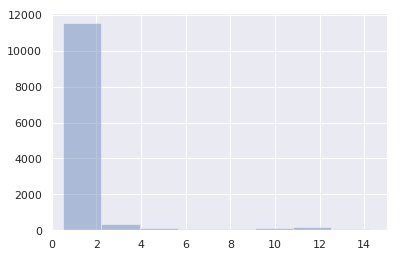

In [36]:
plt.figure()
sns.distplot(np.square(dist_train),
             bins = 10, 
             kde= False);
plt.xlim([0.0,15])

Text(0.5, 0, 'Mahalanobis dist')

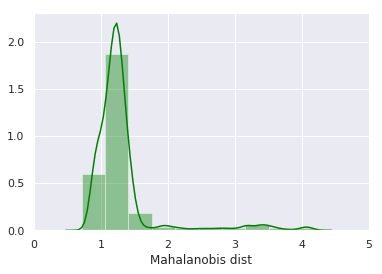

In [37]:
plt.figure()
sns.distplot(dist_train,
             bins = 10, 
             kde= True, 
            color = 'green');
plt.xlim([0.0,5])
plt.xlabel('Mahalanobis dist')

In [40]:
anomaly_train = pd.DataFrame()
anomaly_train['Mob dist']= dist_train
anomaly_train['Thresh'] = threshold
# If Mob dist above threshold: Flag as anomaly
anomaly_train['Anomaly'] = anomaly_train['Mob dist'] > anomaly_train['Thresh']
anomaly_train.index = X_train_PCA.index
anomaly = pd.DataFrame()
anomaly['Mob dist']= dist_train
anomaly['Thresh'] = threshold
# If Mob dist above threshold: Flag as anomaly
anomaly['Anomaly'] = anomaly['Mob dist'] > anomaly['Thresh']
anomaly.index = X_train_PCA.index
anomaly.head()

,Mob dist,Thresh,Anomaly
0,1.150549,3.943199,False
1,1.150536,3.943199,False
2,1.150532,3.943199,False
3,1.150532,3.943199,False
4,1.150483,3.943199,False


In [41]:
anomaly_alldata = pd.concat([anomaly_train, anomaly])
anomaly_alldata.to_csv('Anomaly_distance.csv')

In [44]:
data11 = pd.read_csv('Anomaly_distance.csv')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


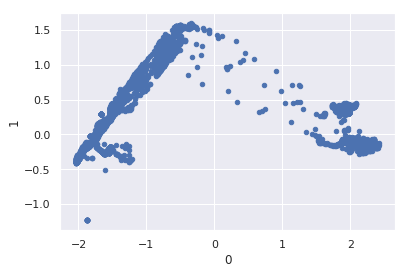

In [74]:
X_train_PCA.head()
X_train_PCA.plot(x=0,y=1,kind='scatter')

In [46]:
X_train

,BFP_SEAL_WATER_FLOW,BFP_SUCT_HDR_PRESS________,AUX_CDSR_2B_PRESS_________,BFP_SUCTION_HDR_TEMP______,BFPT_B_VALVE_DEMAND_HP_STO,BFPT_B_VALVE_DEMAND_LP_STO,BFPT_B_CALC_VALVE_DEMAND__,2B_TDBFP_RECIRC_VLV_DMD___,BFP_2B_DISCHARGE_FLOW_____,BFP_2B_IBRD_SEAL_INJ_FLOW_,...,BFPT_2B_RAD_SHAFT_VIB_IB_B,BFP_2B_AXIAL_SHAFT_VIB____,BFPT_2B_THRUST_BRG_WEAR___,BFP_2B_RAD_SHAFT_VIB_OB_BR,BFP_2B_RAD_SHAFT_VIB_IB_BR,BFPT_2B_AXIAL_SHAFT_VIB___,MAIN_STEAM_FLOW_TO_BFPS___,EXT_STM_FLOW_TO_BFP_2B____,CW_FRM_AUX_CDSR_2B________,CW_TO_AUX_CDS_2B
0,0.199306,0.515014,0.951760,0.253906,0.000333,0.0,0.0,1.0000,0.000000,0.742124,...,0.000000,0.000000,0.613919,0.000000,0.000000,0.0,0.0000,0.0,0.606284,0.724507
1,0.199306,0.515014,0.951760,0.253906,0.000333,0.0,0.0,1.0000,0.000000,0.742124,...,0.000000,0.000000,0.613919,0.000000,0.000000,0.0,0.0000,0.0,0.606284,0.724507
2,0.199306,0.515014,0.951760,0.253906,0.000333,0.0,0.0,1.0000,0.000000,0.742124,...,0.000000,0.000000,0.613919,0.000000,0.000000,0.0,0.0000,0.0,0.606284,0.724507
3,0.199306,0.515014,0.951760,0.253906,0.000333,0.0,0.0,1.0000,0.000000,0.742124,...,0.000000,0.000000,0.613919,0.000000,0.000000,0.0,0.0000,0.0,0.606284,0.724507
4,0.199167,0.515014,0.951760,0.253906,0.000333,0.0,0.0,1.0000,0.000000,0.742124,...,0.000000,0.000000,0.613919,0.000000,0.000000,0.0,0.0000,0.0,0.606284,0.724507
5,0.199167,0.515014,0.951760,0.253906,0.000333,0.0,0.0,1.0000,0.000000,0.742124,...,0.000000,0.000000,0.613919,0.000000,0.000000,0.0,0.0000,0.0,0.606284,0.724507
6,0.199167,0.515014,0.951760,0.253906,0.000333,0.0,0.0,1.0000,0.000000,0.742124,...,0.000000,0.000000,0.613919,0.000000,0.000000,0.0,0.0000,0.0,0.606284,0.724507
7,0.199167,0.515014,0.951760,0.253906,0.000333,0.0,0.0,1.0000,0.000000,0.742124,...,0.000000,0.000000,0.613919,0.000000,0.000000,0.0,0.0000,0.0,0.606284,0.724507
8,0.199167,0.515014,0.951760,0.253877,0.000333,0.0,0.0,1.0000,0.000000,0.742124,...,0.000000,0.000000,0.613919,0.000000,0.000000,0.0,0.0000,0.0,0.606284,0.724507
9,0.199167,0.515014,0.951760,0.253877,0.000333,0.0,0.0,1.0000,0.000000,0.742124,...,0.000000,0.000000,0.613919,0.000000,0.000000,0.0,0.0000,0.0,0.606284,0.724507


In [64]:
seed(47)
tensorflow.random.set_seed(47)
act_func = 'relu'

# Input layer:
model=Sequential()
# First hidden layer, connected to input vector X. 
model.add(Dense(10,activation=act_func,
                kernel_initializer='glorot_uniform',
                kernel_regularizer=regularizers.l2(0.0),
                input_shape=(X_train.shape[1],)
               )
         )
#model.add(Dense(5,activation=act_func,
               #kernel_initializer = 'glorot_uniform'))


model.add(Dense(2,activation=act_func,
                kernel_initializer='glorot_uniform'))
#model.add(Dense(5,activation=act_func,
               #kernel_initializer = 'glorot_uniform'))
model.add(Dense(10,activation=act_func,
                kernel_initializer='glorot_uniform'))
model.add(Dense(25,activation = act_func,
               kernel_initia))
model.add(Dense(X_train.shape[1],
                kernel_initializer='glorot_uniform'))

model.compile(loss='mse',optimizer='adam')

# Train model for 100 epochs, batch size of 10: 
NUM_EPOCHS=100
BATCH_SIZE=10

In [65]:
history=model.fit(np.array(X_train),np.array(X_train),
                  batch_size=BATCH_SIZE, 
                  epochs=NUM_EPOCHS,
                  validation_split=0.05,
                  verbose = 1)

Train on 12027 samples, validate on 634 samples
Epoch 1/100
12027/12027 [==============================] - 1s 102us/step - loss: 0.0315 - val_loss: 0.0275
Epoch 2/100
12027/12027 [==============================] - 1s 97us/step - loss: 0.0085 - val_loss: 0.0240
Epoch 3/100
12027/12027 [==============================] - 1s 94us/step - loss: 0.0078 - val_loss: 0.0243
Epoch 4/100
12027/12027 [==============================] - 1s 96us/step - loss: 0.0070 - val_loss: 0.0243
Epoch 5/100
12027/12027 [==============================] - 1s 93us/step - loss: 0.0066 - val_loss: 0.0235
Epoch 6/100
12027/12027 [==============================] - 1s 95us/step - loss: 0.0061 - val_loss: 0.0139
Epoch 7/100
12027/12027 [==============================] - 1s 94us/step - loss: 0.0048 - val_loss: 0.0135
Epoch 8/100
12027/12027 [==============================] - 1s 95us/step - loss: 0.0044 - val_loss: 0.0136
Epoch 9/100
12027/12027 [==============================] - 1s 100us/step - loss: 0.0043 - val_loss: 0.0

12027/12027 [==============================] - 1s 95us/step - loss: 0.0032 - val_loss: 0.0090
Epoch 78/100
12027/12027 [==============================] - 1s 93us/step - loss: 0.0032 - val_loss: 0.0087
Epoch 79/100
12027/12027 [==============================] - 1s 100us/step - loss: 0.0032 - val_loss: 0.0091
Epoch 80/100
12027/12027 [==============================] - 1s 102us/step - loss: 0.0032 - val_loss: 0.0095
Epoch 81/100
12027/12027 [==============================] - 1s 99us/step - loss: 0.0032 - val_loss: 0.0095
Epoch 82/100
12027/12027 [==============================] - 1s 102us/step - loss: 0.0032 - val_loss: 0.0092
Epoch 83/100
12027/12027 [==============================] - 1s 105us/step - loss: 0.0032 - val_loss: 0.0093
Epoch 84/100
12027/12027 [==============================] - 1s 102us/step - loss: 0.0032 - val_loss: 0.0096
Epoch 85/100
12027/12027 [==============================] - 1s 98us/step - loss: 0.0032 - val_loss: 0.0090
Epoch 86/100
12027/12027 [===================

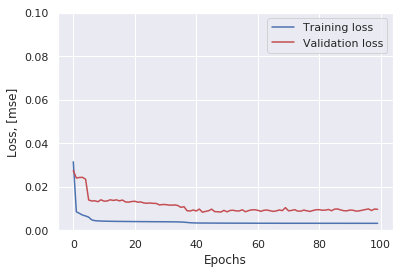

In [66]:
plt.plot(history.history['loss'],
         'b',
         label='Training loss')
plt.plot(history.history['val_loss'],
         'r',
         label='Validation loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss, [mse]')
plt.ylim([0,.1])
plt.show()

In [75]:
print(pd.__version__)

0.24.2


(0.0, 0.5)

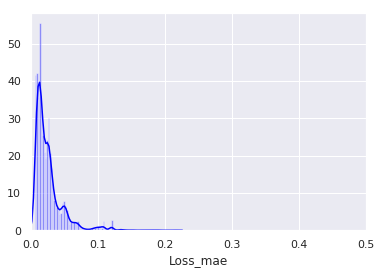

In [88]:
X_pred = model.predict(np.array(X_train))
X_pred = pd.DataFrame(X_pred, 
                      columns=X_train.columns)
X_pred.index = X_train.index

scored = pd.DataFrame(index=X_train.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_train), axis = 1)
plt.figure()
sns.distplot(scored['Loss_mae'],
             bins = 100, 
             kde= True,
            color = 'blue');
plt.xlim([0.0,.5])

In [95]:
X_pred = model.predict(np.array(X_train))
X_pred = pd.DataFrame(X_pred, 
                      columns=X_train.columns)
X_pred.index = X_train.index

scored = pd.DataFrame(index=X_train.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_train), axis = 1)
scored['Threshold'] = 0.13
scored['Anomaly'] = scored['Loss_mae'] > scored['Threshold']
scored.head()

,Loss_mae,Threshold,Anomaly
0,0.120655,0.13,False
1,0.120656,0.13,False
2,0.120656,0.13,False
3,0.120656,0.13,False
4,0.120658,0.13,False


In [96]:
scored

,Loss_mae,Threshold,Anomaly
0,0.120655,0.13,False
1,0.120656,0.13,False
2,0.120656,0.13,False
3,0.120656,0.13,False
4,0.120658,0.13,False
5,0.120658,0.13,False
6,0.120659,0.13,False
7,0.120659,0.13,False
8,0.120660,0.13,False
9,0.120660,0.13,False


In [105]:
scored

,Loss_mae,Threshold,Anomaly
0,0.120655,0.13,False
1,0.120656,0.13,False
2,0.120656,0.13,False
3,0.120656,0.13,False
4,0.120658,0.13,False
5,0.120658,0.13,False
6,0.120659,0.13,False
7,0.120659,0.13,False
8,0.120660,0.13,False
9,0.120660,0.13,False
